#Anggota Kelompok:
Muhammad Farhan (1103220187)

Fasya Burhanis syauqi (1103223054)

#.

# Chapter 1: The Amazing World of TensorFlow

**Book:** TensorFlow in Action  
**Reference:** Figure 1.4 & Section 1.2  
**Topic:** Introduction to TF Ecosystem & Hardware Acceleration

## 1. Chapter Summary
 Berikut adalah poin-poin kunci yang dibahas:

* **Definisi TensorFlow:** Bukan sekadar library Deep Learning, melainkan framework *end-to-end* yang mencakup seluruh siklus hidup Machine Learning: mulai dari pengolahan data (`tf.data`), pembangunan model (Keras), monitoring (TensorBoard), hingga deployment (TF Serving).
* **Analogi Hardware (CPU vs GPU vs TPU):**
    * **CPU** diibaratkan sebagai **Mobil Ferrari**: Cepat (*low latency*) tapi hanya bisa membawa sedikit penumpang (data). Cocok untuk instruksi kompleks berurutan.
    * **GPU** diibaratkan sebagai **Bus**: Lebih lambat per perjalanan, tapi bisa membawa banyak penumpang sekaligus (*high throughput*). Cocok untuk operasi paralel masif seperti Deep Learning.
    * **TPU** diibaratkan sebagai **Bus Hemat**: Didesain khusus untuk rute tertentu (Machine Learning dengan presisi bfloat16), sangat efisien untuk tugas spesifiknya.
* **Kapan Menggunakan TensorFlow:** Sangat disarankan untuk *Deep Learning* (CNN, RNN, Transformers), pipeline data skala besar, dan deployment produksi.
* **Kapan TIDAK Menggunakan TensorFlow:** Hindari TF untuk algoritma ML tradisional (gunakan Scikit-Learn), manipulasi data kecil (gunakan Pandas), atau preprocessing teks NLP yang sangat kompleks (gunakan spaCy).
* **Performa:** TensorFlow menunjukkan performa yang jauh lebih stabil (*linear growth*) dibandingkan NumPy (*exponential growth*) saat ukuran data matriks membesar.

## 2. Theoretical Explanation (AI Assisted)
*Bagian ini menjelaskan konsep teoritis mendalam mengenai Hardware Acceleration yang dibahas di Section 1.2.*

### Mengapa GPU/TPU Lebih Cepat dari CPU untuk Deep Learning?

Deep Learning pada dasarnya adalah operasi matematika matriks (perkalian dan penjumlahan) yang dilakukan berulang-ulang jutaan kali.

1.  **Arsitektur CPU (Latency Oriented):**
    * Memiliki sedikit *core* (misal: 8-16 core).
    * Setiap core sangat kuat dan bisa menangani instruksi logis yang rumit.
    * **Kelemahan di DL:** Memproses operasi matriks satu per satu (serial) atau paralel terbatas, sehingga lambat untuk jutaan parameter.

2.  **Arsitektur GPU (Throughput Oriented):**
    * Memiliki ribuan *core* (misal: 2000+ core) yang lebih sederhana.
    * Didesain untuk *Parallelism*. GPU bisa mengalikan ribuan angka secara bersamaan dalam satu denyut waktu.
    * **Kekuatan di DL:** Karena Neural Network adalah operasi matriks besar, GPU bisa menyelesaikannya jauh lebih cepat daripada CPU.

3.  **Tensor Processing Unit (TPU):**
    * Ini adalah *Application-Specific Integrated Circuit* (ASIC) buatan Google.
    * Menggunakan presisi angka **bfloat16** (16-bit) alih-alih 32-bit standar. Ini mengurangi penggunaan memori dan mempercepat hitungan tanpa mengorbankan akurasi model secara signifikan.

TensorFlow Version: 2.19.0
Num GPUs Available:  0

Mulai Benchmark (Ini mungkin memakan waktu)...
NumPy - Size 100: 0.0056 s
TensorFlow - Size 100: 0.0003 s
NumPy - Size 500: 0.0347 s
TensorFlow - Size 500: 0.0125 s
NumPy - Size 1000: 0.1683 s
TensorFlow - Size 1000: 0.0432 s
NumPy - Size 2000: 1.2752 s
TensorFlow - Size 2000: 0.2388 s
NumPy - Size 5000: Skipped (Too slow/heavy)
TensorFlow - Size 5000: 3.6468 s


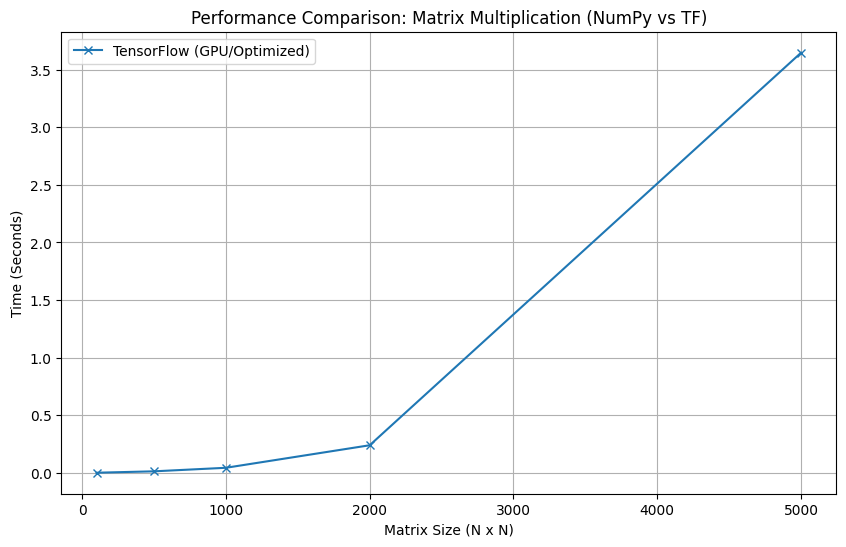

In [2]:
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt

# Memastikan TensorFlow menggunakan GPU jika tersedia
print(f"TensorFlow Version: {tf.__version__}")
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

def measure_time(library, size):
    """
    Fungsi untuk mengukur waktu perkalian dua matriks berukuran (size x size)
    """
    # Generate random matrices
    if library == 'numpy':
        start_time = time.time()
        # NumPy menggunakan CPU
        a = np.random.rand(size, size)
        b = np.random.rand(size, size)
        c = np.dot(a, b)
        end_time = time.time()
    elif library == 'tensorflow':
        # TensorFlow akan otomatis menggunakan GPU jika tersedia
        # Menggunakan random.normal untuk membuat Tensor
        a = tf.random.normal((size, size))
        b = tf.random.normal((size, size))

        start_time = time.time()
        c = tf.matmul(a, b)
        end_time = time.time()

    return end_time - start_time

# Ukuran matriks yang akan diuji (semakin besar semakin terlihat bedanya)
# Catatan: Jika RAM terbatas, kurangi angka 5000
sizes = [100, 500, 1000, 2000, 5000]

numpy_times = []
tf_times = []

print("\nMulai Benchmark (Ini mungkin memakan waktu)...")

for size in sizes:
    # Benchmark NumPy
    if size <= 2000:
        t_np = measure_time('numpy', size)
        numpy_times.append(t_np)
        print(f"NumPy - Size {size}: {t_np:.4f} s")
    else:
        numpy_times.append(None) # Skip jika terlalu besar untuk NumPy di CPU standar
        print(f"NumPy - Size {size}: Skipped (Too slow/heavy)")

    # Benchmark TensorFlow
    t_tf = measure_time('tensorflow', size)
    tf_times.append(t_tf)
    print(f"TensorFlow - Size {size}: {t_tf:.4f} s")

# --- Visualisasi Hasil (Seperti Figure 1.4 di Buku) ---
plt.figure(figsize=(10, 6))
if None not in numpy_times:
    plt.plot(sizes, numpy_times, label='NumPy (CPU)', marker='o')
plt.plot(sizes, tf_times, label='TensorFlow (GPU/Optimized)', marker='x')

plt.title('Performance Comparison: Matrix Multiplication (NumPy vs TF)')
plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Time (Seconds)')
plt.legend()
plt.grid(True)
plt.show()

## 3. Conclusion & Reflection
Dari hasil eksperimen kode di atas (reproduksi Figure 1.4), kita dapat menyimpulkan:
1.  **Small Data:** Untuk matriks kecil, perbedaan waktu antara NumPy dan TensorFlow tidak signifikan.
2.  **Scalability:** Saat ukuran matriks membesar, waktu eksekusi NumPy meningkat secara eksponensial (sangat lambat).
3.  **TF Efficiency:** TensorFlow berhasil menjaga waktu eksekusi tetap rendah berkat optimalisasi hardware (paralelisasi pada GPU/CPU).

Ini membuktikan teori di Bab 1 bahwa TensorFlow sangat diperlukan saat kita mulai bekerja dengan data berskala besar (*Deep Learning Scale*).